In [1]:
#importing libraries from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd #data processing
import os
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [57]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier

In [69]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
#read data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [5]:
#Fill null values and create news columns
test=test.fillna(' ')
train=train.fillna(' ')
test['news']=test['title']+' '+test['author']+test['text']
train['news']=train['title']+' '+train['author']+train['text']

In [6]:
test['news']

0       Specter of Trump Loosens Tongues, if Not Purse...
1       Russian warships ready to strike terrorists ne...
2       #NoDAPL: Native American Leaders Vow to Stay A...
3       Tim Tebow Will Attempt Another Comeback, This ...
4       Keiser Report: Meme Wars (E995) Truth Broadcas...
                              ...                        
5195    The Bangladeshi Traffic Jam That Never Ends - ...
5196    John Kasich Signs One Abortion Bill in Ohio bu...
5197    California Today: What, Exactly, Is in Your Su...
5198    300 US Marines To Be Deployed To Russian Borde...
5199    Awkward Sex, Onscreen and Off - The New York T...
Name: news, Length: 5200, dtype: object

In [7]:
train['news']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799    What Keeps the F-35 Alive David Swanson  David...
Name: news, Length: 20800, dtype: object

In [9]:
# stopwords 
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
lemmatizer=WordNetLemmatizer()

In [11]:
#preprocessing train data
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'news'] = filter_sentence

In [13]:
#preprocessing test data
for index,row in test.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    test.loc[index,'news'] = filter_sentence

In [14]:
X_train = train['news']
Y_train = train['label']

In [17]:
#vectorization 
vectorizer = CountVectorizer()

In [18]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [42]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tf_idf_matrix=tfidf.fit_transform(freq_term_matrix)

In [43]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

In [23]:
test_pred = test['news']

In [44]:
freq_term_matrix_test = count_vectorizer.transform(test_pred)
tf_idf_matrix_test = tfidf.transform(freq_term_matrix_test)

In [58]:
#test train split to measure the performance of models
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix,Y_train , test_size=0.2, random_state=42)

In [45]:
tf_idf_matrix_test

<5200x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 1403400 stored elements in Compressed Sparse Row format>

In [59]:
rfclassifier = RandomForestClassifier(n_estimators=500 )

In [60]:
rfclassifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [124]:
y_pred = rfclassifier.predict(X_test)

In [125]:
rfacc = accuracy_score(y_test, y_pred)

In [70]:
rff1_score = metrics.f1_score(y_test, y_pred)

In [71]:
rff1_score

0.9500376600552348

In [143]:
model = XGBClassifier(scale_pos_weight=1,learning_rate=0.1,colsample_bytree = 0.6,subsample = 0.8,objective='binary:logistic',n_estimators=2000, reg_alpha = 0.5,max_depth=6, gamma=10)

In [144]:
model.fit(X_train,y_train)


XGBClassifier(colsample_bytree=0.6, gamma=10, max_depth=6, n_estimators=2000,
              reg_alpha=0.5, subsample=0.8)

In [145]:
y_pred=model.predict(X_test)

In [146]:
#output generated from xgboost classifier is taken for phase 2 after model selection
output = model.predict(tf_idf_matrix_test)

In [98]:
xgbacc = accuracy_score(y_test, y_pred)

In [97]:
xgbf1_score = metrics.f1_score(y_test, y_pred)

In [105]:
xgbf1_score

0.9615290370007351

In [76]:
from sklearn.linear_model import LogisticRegression

In [83]:
 model = LogisticRegression()
 

In [84]:
model.fit(X_train,y_train)

LogisticRegression()

In [107]:
y_pred=model.predict(X_test)

In [108]:
lracc = accuracy_score(y_test, y_pred)

In [109]:
lf1_score = metrics.f1_score(y_test, y_pred)

In [110]:
lf1_score

0.9615290370007351

In [116]:
naive_bayes = MultinomialNB()

In [117]:
naive_bayes.fit(X_train,y_train)

MultinomialNB()

In [118]:
y_pred=naive_bayes.predict(X_test)

In [119]:
nbf1_score = metrics.f1_score(y_test, y_pred)

In [120]:
nbf1_score

0.8294506758700028

In [121]:
nbacc = accuracy_score(y_test, y_pred)

In [122]:
nbacc

0.8574519230769231

In [ ]:
output = 

In [127]:
# plot of accuracy and f1score 
names = ['rf','xgboost','lr','nb']
accuracy = []
accuracy.append(rfacc)
accuracy.append(xgbacc)
accuracy.append(lracc)
accuracy.append(nbacc)

In [131]:
f1_score=[]
f1_score.append(rff1_score)
f1_score.append(xgbf1_score)
f1_score.append(lf1_score)
f1_score.append(nbf1_score)

In [134]:
results=[]
results.append(accuracy)
results.append(f1_score)

In [137]:
x=np.arange(4)

In [ ]:
accuracy

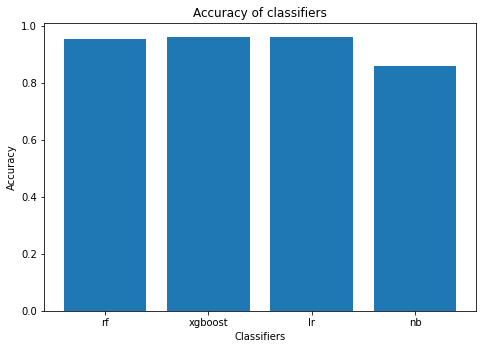

In [141]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names,accuracy)
ax.set_title("Accuracy of classifiers")
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifiers')
plt.show()


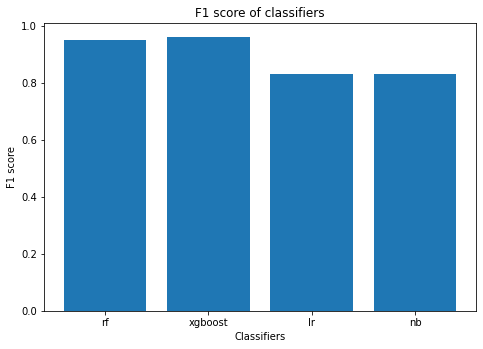

In [142]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names,f1_score)
ax.set_title("F1 score of classifiers")
ax.set_ylabel('F1 score')
ax.set_xlabel('Classifiers')
plt.show()

In [ ]:
#Extracting all the data that has been classified fake for phase two test analysis

In [147]:
test

,id,title,author,text,news
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",specter trump loosens tongue purse string sil...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship ready strike terrorist near a...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,nodapl native american leader vow stay winter...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",tim tebow attempt another comeback time baseb...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,keiser report meme war e995 truth broadcast n...
...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,bangladeshi traffic jam never end new york ti...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,john kasich sign one abortion bill ohio veto ...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,california today exactly sushi new york time ...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...,300 u marine deployed russian border norway p...


In [149]:
# appending output generated as label column to test data
test['label']= output

In [150]:
test

,id,title,author,text,news,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",specter trump loosens tongue purse string sil...,0
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship ready strike terrorist near a...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,nodapl native american leader vow stay winter...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",tim tebow attempt another comeback time baseb...,0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,keiser report meme war e995 truth broadcast n...,1
...,...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,bangladeshi traffic jam never end new york ti...,1
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,john kasich sign one abortion bill ohio veto ...,0
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,california today exactly sushi new york time ...,0
5198,25998,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...,300 u marine deployed russian border norway p...,1


In [152]:
# 0 is real 1 is fake extracting only fake
fake_news = test.loc[test['label']==1]

In [153]:
fake_news

,id,title,author,text,news,label
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship ready strike terrorist near a...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,nodapl native american leader vow stay winter...,1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,keiser report meme war e995 truth broadcast n...,1
5,20805,Trump is USA's antique hero. Clinton will be n...,,Trump is USA's antique hero. Clinton will be n...,trump usa antique hero clinton next president...,1
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...,weekly featured profile randy shannon trevor ...,1
...,...,...,...,...,...,...
5189,25989,Amazon extends olive branch to Megyn Kelly ove...,Staff Writer,11.23.2016 @4:17 PM EST More Establishment tie...,amazon extends olive branch megyn kelly book ...,1
5192,25992,Earth To Ammosexuals: NRA Admits No One Is Com...,Natalie Dailey,Earth To Ammosexuals: NRA Admits No One Is Com...,earth ammosexuals nra admits one coming gun v...,1
5193,25993,Toyota Recalls 1.4 Million Vehicles as 2nd Maj...,Hiroko Tabuchi and Jonathan Soble,Public concern about faulty automobile airbags...,toyota recall 14 million vehicle 2nd major ai...,1
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,bangladeshi traffic jam never end new york ti...,1


In [154]:
# creating a fake news test file for phase 2 
fake_news.to_csv('./test1.csv')